### Homework 3: Machine Learning for Classification for Machine Learning Zoomcamp 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Prepare dataset

In [2]:
df = pd.read_csv("bank-full.csv", sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


df.dtypes

In [8]:
base = ['age','job','marital','education','balance','housing','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

#### Data preparation

In [11]:
df = df[base]

In [13]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Question 1

<p>What is the most frequent observation (mode) for the column education?</p>

In [19]:
df['education'].mode()[0]

'secondary'

#### Question 2

<p>Question 2. Two features with the biggest correlation </p>

In [23]:
num = df.select_dtypes(include=['int64', 'float64'])
num.dtypes

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [25]:
num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [27]:
mat_corr = num.corr()
mat_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


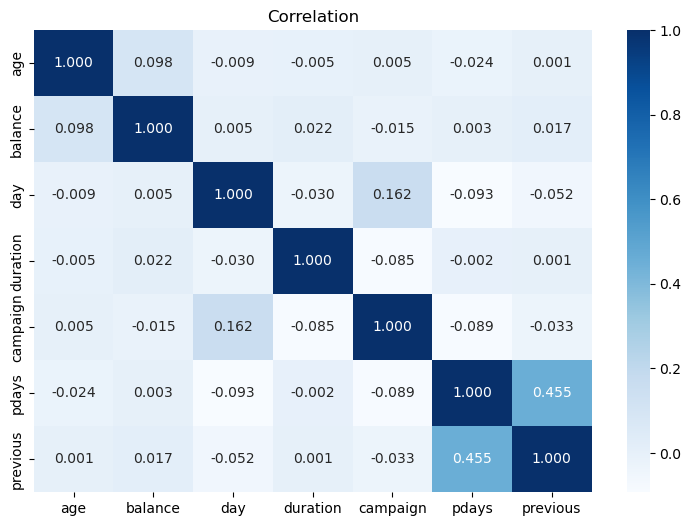

In [30]:
plt.figure(figsize=(9, 6))
sns.heatmap(num.corr(), annot=True, cmap='Blues', fmt='.3f')
plt.title('Correlation')
plt.show()

In [33]:
df.y = (df.y == 'yes').astype(int)

In [39]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [41]:
df['y'].tail()

45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, dtype: int32

In [43]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [45]:
df.tail()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,2971,no,cellular,17,nov,361,2,188,11,other,0


In [47]:
df.y.value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [53]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [55]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [57]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

#### Question 3

In [60]:
from sklearn.metrics import mutual_info_score

In [62]:
categorical = list(df.dtypes[df.dtypes == object].index)
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [64]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train).round(2)

In [66]:
mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False).to_frame(name='MI')

,MI
month,0.03
poutcome,0.03
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


### Question 4 

In [69]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
dv = DictVectorizer(sparse=False)

In [73]:
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'age': 32,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'balance': 1100,
 'housing': 'yes',
 'contact': 'cellular',
 'day': 11,
 'month': 'aug',
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [75]:
X_train = dv.fit_transform(train_dict)
X_train.shape

(27126, 47)

In [77]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [79]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [81]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [85]:
model.intercept_[0]

-0.9075237913978677

In [87]:
model.coef_[0].round(3)

array([-2.000e-03,  0.000e+00, -8.000e-02,  2.470e-01,  7.100e-02,
       -1.226e+00,  6.000e-03,  4.000e-03, -4.180e-01, -2.310e-01,
       -7.200e-02, -1.860e-01, -1.020e-01, -8.050e-01,  7.400e-02,
       -2.410e-01, -2.400e-01, -2.790e-01, -9.200e-02,  3.360e-01,
       -2.730e-01, -1.530e-01,  2.420e-01, -1.630e-01,  1.600e-02,
       -1.330e-01, -2.960e-01, -4.470e-01, -1.640e-01,  7.600e-02,
       -6.730e-01,  3.180e-01, -3.140e-01, -9.450e-01, -9.480e-01,
        2.620e-01,  1.244e+00, -4.730e-01, -9.000e-01,  7.360e-01,
        7.110e-01, -1.000e-03, -7.640e-01, -5.450e-01,  1.487e+00,
       -1.085e+00,  3.000e-03])

In [89]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.01315207, 0.01039464, 0.14683511, ..., 0.05419486, 0.00999035,
       0.2869727 ])

In [91]:
y_decision = (y_pred >= 0.5)

In [93]:
original_accuracy = (y_val == y_decision).mean()

In [95]:
original_accuracy.round(2)

0.9

#### Question 5. Feature with the smallest difference

In [99]:
def accuracy(df_train, y_train, df_val, y_val, feature_to_drop):
    df_train_modified = df_train.drop(columns=[feature_to_drop])
    df_val_modified = df_val.drop(columns=[feature_to_drop])
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train_modified.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val_modified.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    y_decision = (y_pred >= 0.5)

    return (y_val == y_decision).mean()

In [101]:
accuracies = {}
differences = []

for feature in df_train.columns:
    if feature not in df_train.columns:
        continue
    acc = accuracy(df_train, y_train, df_val, y_val, feature)
    accuracies[feature] = acc
    accuracy_difference = original_accuracy - acc
    abs_difference = abs(accuracy_difference)
    differences.append((abs_difference, feature, acc))
    print(f'Accuracy without {feature}: {acc} (Difference from original: {abs_difference})')

smallest_difference, corresponding_feature, corresponding_accuracy = min(differences, key=lambda x: x[0])
print(f'Smallest difference: {smallest_difference}, corresponding feature excluded: {corresponding_feature}, resulting accuracy: {corresponding_accuracy}')

Accuracy without age: 0.9011280690112807 (Difference from original: 0.0)
Accuracy without job: 0.9011280690112807 (Difference from original: 0.0)
Accuracy without marital: 0.900353904003539 (Difference from original: 0.000774165007741745)
Accuracy without education: 0.9007962840079629 (Difference from original: 0.00033178500331787486)
Accuracy without balance: 0.9011280690112807 (Difference from original: 0.0)
Accuracy without housing: 0.900575094005751 (Difference from original: 0.0005529750055297544)
Accuracy without contact: 0.9007962840079629 (Difference from original: 0.00033178500331787486)
Accuracy without day: 0.9007962840079629 (Difference from original: 0.00033178500331787486)
Accuracy without month: 0.8996903339969033 (Difference from original: 0.0014377350143773837)
Accuracy without duration: 0.8902897589028976 (Difference from original: 0.010838310108383098)
Accuracy without campaign: 0.8998009289980093 (Difference from original: 0.0013271400132713884)
Accuracy without pda

In [103]:
original_accuracy

0.9011280690112807

#### Question 6

In [114]:
from sklearn.metrics import accuracy_score
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(c, round(accuracy_score(y_val, y_pred), 3))

0.01 0.898
0.1 0.901
1 0.901
10 0.902
100 0.901
